In [2]:
import pandas as pd

# Loading processed data from Notebook 01
meta_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\01 - Metadata.csv", index_col=0)
expr_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\01 - Expr Data Cleaned.csv", index_col=0)

# Data Reloading and Alignment 

Processed expression and metadata tables generated in Notebook 01 were reloaded from disk. Following reload, sample identifiers were explicitly checked and aligned using GSM accession IDs to ensure correct correspondence between metadata rows and expression columns prior to analysis.

In [6]:
# Drop ID_REF column introduced during CSV reload
expr_df = expr_df.drop(columns=["ID_REF"])

In [8]:
# Remove quotation marks from metadata index
meta_df.index = meta_df.index.str.replace('"', '', regex=False)

In [10]:
expr_df = expr_df[meta_df.index]

In [12]:
assert list(meta_df.index) == list(expr_df.columns)

In [14]:
# Alignment verified — do not reorder samples downstream

Expression columns were reordered to match the metadata index based on GSM accession identifiers, ensuring consistent sample ordering for all downstream analyses.


In [17]:
# Define disease-level groups
ctrl_samples = meta_df[meta_df["disease_status"] == "Control"].index
dmd_samples  = meta_df[meta_df["disease_status"] == "DMD"].index

len(ctrl_samples), len(dmd_samples)

(6, 16)

# Differential Expression: DMD vs Control

To identify transcriptional changes associated with Duchenne muscular dystrophy, mean expression levels were compared between DMD patient samples and pathologically normal control samples. Differential expression was quantified using log2 fold change, consistent with the log-transformed nature of microarray expression value.


Mean expression levels were computed separately for Duchenne muscular dystrophy (DMD) patient samples and pathologically normal control samples. Differential expression was quantified as the difference in mean log2 expression values (log2 fold change), consistent with the log-transformed nature of Affymetrix microarray data. This approach provides a ranking of probes based on the magnitude and direction of disease-associated transcriptional change.

In [23]:
# Mean expression per group
mean_ctrl = expr_df[ctrl_samples].mean(axis=1)
mean_dmd  = expr_df[dmd_samples].mean(axis=1)

# Log2 fold change (array data is already log2-transformed)
log2fc_dmd_ctrl = mean_dmd - mean_ctrl

# Assemble results table
de_dmd_ctrl = pd.DataFrame({
    "mean_control": mean_ctrl,
    "mean_dmd": mean_dmd,
    "log2FC": log2fc_dmd_ctrl
}).sort_values("log2FC", ascending=False)

de_dmd_ctrl.head(10)  # most upregulated

,mean_control,mean_dmd,log2FC
54206,4.320852,13.744169,9.423317
15387,5.229859,13.853884,8.624025
16163,5.431540,13.735486,8.303946
11759,4.035683,10.616064,6.580381
19281,2.515965,9.046366,6.530402
13096,4.725319,11.253787,6.528468
14592,5.006958,11.375035,6.368076
40121,2.952951,9.055114,6.102163
24683,4.180008,10.118654,5.938646
39054,5.379425,11.217419,5.837995


In [25]:
de_dmd_ctrl.tail(10)   # most downregulated

,mean_control,mean_dmd,log2FC
15795,6.817796,2.332271,-4.485525
51520,7.172631,2.665427,-4.507204
30292,6.881099,2.356340,-4.524759
14477,6.955203,2.373026,-4.582177
36925,6.917692,2.261655,-4.656038
23180,8.691740,3.871739,-4.820001
4147,8.158714,3.277573,-4.881140
6057,10.030759,4.897808,-5.132950
33847,7.486405,2.267626,-5.218779
15141,7.982792,2.273970,-5.708823


# Distribution of Differential Expression

The distribution of log2 fold change values across all probes was visualized to assess the global transcriptional landscape of DMD muscle tissue relative to controls. A strong central peak around zero indicates that most genes are not differentially expressed, while extended tails reflect subsets of probes exhibiting substantial disease-associated upregulation or downregulation.


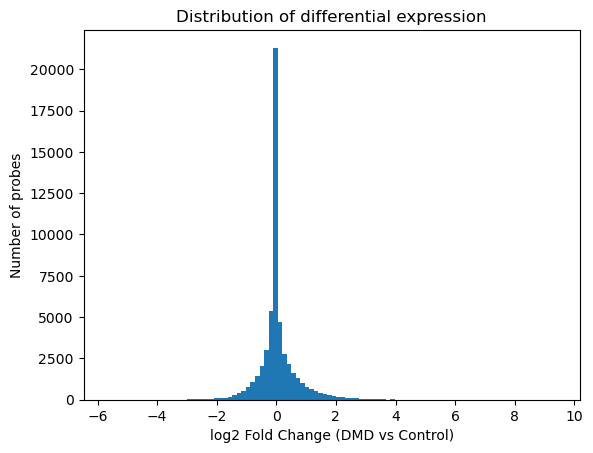

In [33]:
plt.hist(de_dmd_ctrl["log2FC"], bins=100)
plt.xlabel("log2 Fold Change (DMD vs Control)")
plt.ylabel("Number of probes")
plt.title("Distribution of differential expression")

plt.savefig(
    r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\02 - log2FC_distribution_DMD_vs_Control.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


These results indicate widespread but structured transcriptional remodeling in Duchenne muscular dystrophy muscle tissue.


In [35]:
# Saving processed data
meta_df.to_csv(r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\02 - Metadata.csv")
expr_df.to_csv(r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\02 - Expr_Data.csv")
de_dmd_ctrl.to_csv(r"C:\Users\Lenovo\Desktop\UG Stream\Notebooks\02 - DE_DMD_vs_Control.csv")

print("Saved!")

Saved!


## Notebook 02 Summary and Next Steps

In this notebook, processed expression and metadata tables generated in the previous step were loaded and verified for correct sample alignment. Differential expression between Duchenne muscular dystrophy (DMD) patient samples and pathologically normal control samples was quantified using mean log2 fold change, providing a ranked view of disease-associated transcriptional changes. The global distribution of differential expression values was visualized to assess the overall structure of transcriptomic remodeling in DMD muscle tissue. All intermediate results and figures were saved to disk to ensure reproducibility and modular downstream analysis.

In the next notebook, differentially expressed probes will be mapped to gene-level identifiers, followed by pathway- and systems-level analyses to interpret the biological processes and mechanisms underlying DMD progression.
